### 標本平均の性質(中心極限定理) Features of sample mean (CLT)

In [1]:
import numpy as np
import scipy.stats as ss
from matplotlib import pyplot as plt

$\lambda =0.5$ の指数分布からサンプルサイズが100の標本データを10000セット作成  
Create 10000 sets of sample data with sample size 100 from exponential distribution with $\lambda =0.5$

In [2]:
# 指数分布のパラメータを0.5とする　Set the exponential distribution parameter lambda to 0.5
lam = 0.5
# 母平均，母標準偏差は1/lam. Population mean and population standard deviation are 1/lam
mean = 1/lam
std = 1/lam

# サンプルサイズを100とする Set the sample size to 100
sample_size = 1000

# 指数分布の標本を10000セット作成し，それぞれの標本に対して平均を求める
# generate 10000 samples from the exponential distribution, and calculate the sample mean
sample_mean = [] # 標本平均を格納するリストsample_meanを用意
for i in range(0,10000):
    # 指数分布から乱数を生成
    # generate the R.V. of the exponential distribution
    sample = ss.expon.rvs(size=sample_size, scale=1/lam) 
    # 標本平均を求める. calculate the sample mean
    sample_mean.append(np.mean(sample))

標本平均のヒストグラムをプロット  
plot the histgram of sample mean

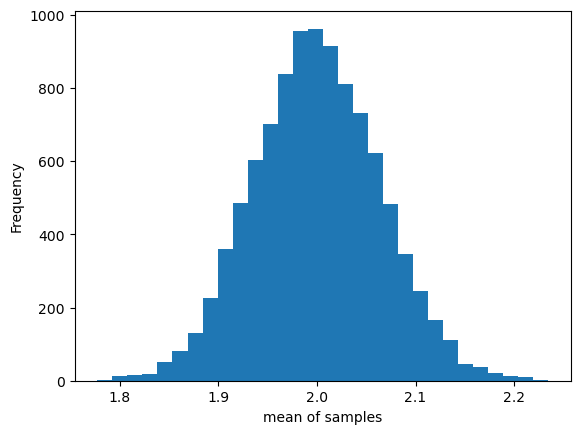

In [3]:
plt.hist(sample_mean,bins=30)
plt.xlabel("mean of samples")
plt.ylabel("Frequency")
plt.show()

求められた標本平均の平均を求める．さらに，指数分布の母平均と比較  
calculate the mean of the sample mean. Compare with population mean of exponential distribution

In [4]:
m = np.mean(sample_mean)
print(m) # 標本平均の平均　the mean of sample mean
pop_mean = 1/lam # 指数分布の母平均　population mean of exponential distribution
print(pop_mean)

1.9997992394363093
2.0


求められた標本平均の標準偏差を求める．さらに，中心極限定理の標準偏差の理論値と比較  
Calculate the standard deviation of the sample mean. Compare with the theoretical value of the standard deviation of the central limit theorem.

In [5]:
#求められた標本平均の標準偏差を求める
#calculate the standard deviation of sample mean
s = np.std(sample_mean)
print(s)

# 理論値となる標準偏差を求める
# calculate the standard deviation in theory
std = 1/lam #指数分布の母標準偏差　population standard deviation of exponential distribution
theo_std = std/np.sqrt(sample_size)
print(theo_std)

0.0638101724989571
0.06324555320336758


平均pop_mean，標準偏差theo_stdの正規分布の確率密度関数を求める  
calculate pdf of the normal distribution N[pop_mean,theo_std$^2$]

In [6]:
k=np.arange(1,3,0.01)
f = ss.norm.pdf(x=k,loc=pop_mean,scale=theo_std)

標本平均のヒストグラムと正規分布の確率密度関数の折れ線グラフを重ねてプロット  
plot the histogram of sample mean and the pdf of the normal distribution

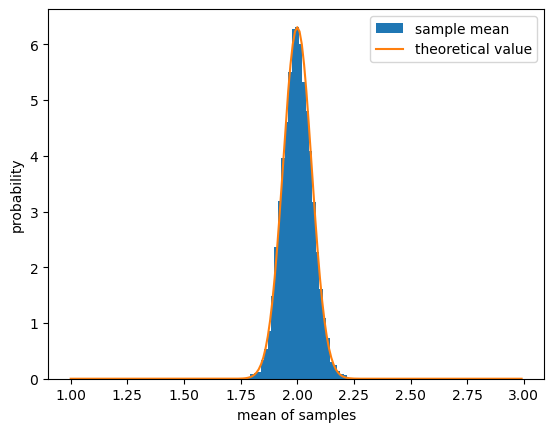

In [7]:
plt.hist(sample_mean,bins=30,density=True,label="sample mean")
plt.plot(k,f,label="theoretical value")
plt.xlabel("mean of samples")
plt.ylabel("probability")
plt.legend()
plt.show()